# Quadrados Mínimos e Ajustes de Curvas

In [1]:
using Plots
pyplot(size=(400,300))

  likely near In[1]:68


Plots.PyPlotBackend()

O problema de ajuste de um conjunto de dados à um modelo, simplesmente dito ajuste de curvas, é um problema bastante prático e recorrente.
Esse problema acontece quando temos muito mais informação que o necessário para se determinar exatamente um modelo. Mas isso também só faz sentido se essa informação tiver 
algum tipo de erro experimental ou intrínseco.

Considere o seguinte problema de ajustar um conjunto de pontos por uma reta.


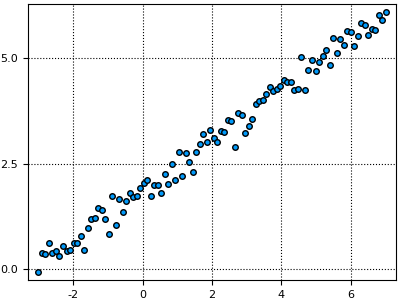

In [2]:
m = 100
x = linspace(-3, 7, m)
y = 1.9 + 0.6*x + randn(m)*0.2 # Gerando pontos aleatórios

scatter(x, y, leg=false)

Não existe uma reta que passa por todos esses pontos. Inclusive, alguns deles podem ter o mesmo $x$,
de modo que não existe nenhum função que passa por eles.
Sendo assim, precisamos encontrar uma reta que aproxima estes pontos.

Essa reta é definida por $L(x) = \alpha + \beta x$, e precisamos encontrar esses valores para $\alpha$ e $\beta$.

Uma estratégia é considerar o erro de aproximação e tentar minimizá-lo.
Vamos separar o erro termo a termo, obtendo assim um Erro$_i$, que depende
dos valores de $\alpha$ e $\beta$.

Nosso problema pode ser escrito como
$$ \min E(\alpha,\beta) = \sum_{i=1}^m \mbox{Erro}_i(\alpha,\beta). $$

Já sabemos que para minimizar uma função, devemos buscar seus pontos críticos.
Isto é,
$$ \frac{\partial E}{\partial \alpha} = 0, $$
e
$$ \frac{\partial E}{\partial \beta} = 0. $$

Para calcular essa derivada, devemos calcular a derivada de Erro$_i$.
Então, a escolha dessa função de erro deve ser bem pensada, para que seja
significativa e fácil de derivar.

A escolha mais comum é Erro$_i = \frac{1}{2}[\alpha + \beta x_i - y_i]^2 = \frac{1}{2}[L(x_i) - y_i]^2$.

Essa escolha é boa pois a derivada dessa função é fácil de calcular, e é fácil de visualizar que é o quadrado da distância vertical da reta ao ponto $(x_i,y_i)$.

In [3]:
1 + x - y

100-element Array{Float64,1}:
 -1.9334 
 -2.27908
 -2.15059
 -2.33044
 -1.99008
 -1.92788
 -1.71641
 -1.84867
 -1.63021
 -1.54193
 -1.61645
 -1.51868
 -1.5745 
  ⋮      
  1.24248
  1.35154
  1.80087
  1.66325
  1.43925
  1.59199
  1.93357
  1.90626
  2.01102
  1.76674
  1.97737
  1.89112

In [4]:
sum((1 + x - y).^2)

141.9797514095344

In [5]:
E(α,β) = 0.5 * sum((α + β*x - y).^2)

E (generic function with 1 method)

In [6]:
E(0,0)

625.6646333387831


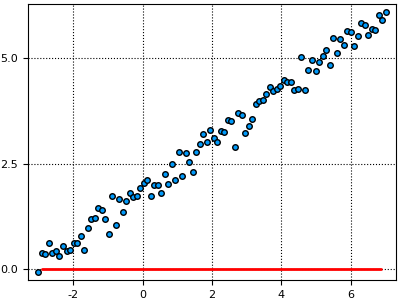

In [7]:
scatter(x, y, leg=false)
plot!(x->0 + 0*x, x[1], x[m], c=:red, lw=2)

In [8]:
E(2,0)

211.69298831361732


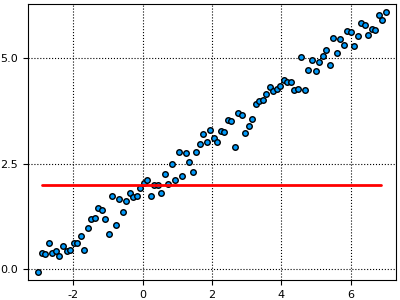

In [9]:
scatter(x, y, leg=false)
plot!(x->2 + 0*x, x[1], x[m], c=:red, lw=2)

In [10]:
E(2,0.5)

6.577476981857034


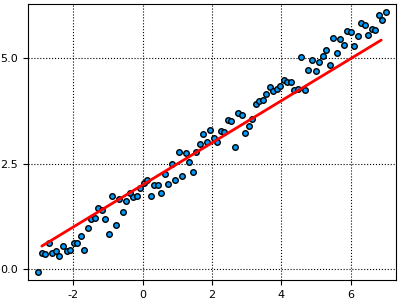

In [11]:
scatter(x, y, leg=false)
plot!(x->2 + 0.5*x, x[1], x[m], c=:red, lw=2)

É fácil ver que

$$ \partial_{\alpha} E(\alpha,\beta) = \sum_{i=1}^m (\alpha + \beta x_i - y_i), $$
e
$$ \partial_{\beta} E(\alpha,\beta) = \sum_{i=1}^m x_i (\alpha + \beta x_i - y_i). $$

Como nosso objetivo é encontrar $\alpha$ e $\beta$ tal que essas duas equações sejam zero, obtemos um sistema em $\alpha$ e $\beta$:

\begin{align*}
\alpha \bigg(\sum_{i=1}^m 1\bigg) + \beta\bigg(\sum_{i=1}^m x_i\bigg) & = \sum_{i=1}^m y_i \\
\alpha \bigg(\sum_{i=1}^m x_i\bigg) + \beta\bigg(\sum_{i=1}^m x_i^2\bigg) & = \sum_{i=1}^m x_i y_i
\end{align*}

Esse sistema é bastante fácil de resolver.

In [12]:
# Lembrando
dot(x, y)

1122.773110205608

In [13]:
M = [m  sum(x); sum(x)   dot(x,x)]

2×2 Array{Float64,2}:
 100.0   200.0 
 200.0  1250.17

In [14]:
b = [sum(y); dot(x,y)]

2-element Array{Float64,1}:
  306.986
 1122.77 

In [15]:
α, β = M\b

2-element Array{Float64,1}:
 1.87292 
 0.598471

In [16]:
E(α,β)

2.211587917137649


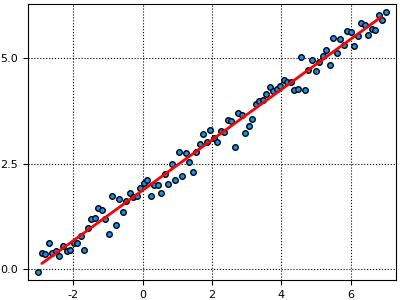

In [17]:
scatter(x, y, leg=false)
plot!(x->α + β*x, x[1], x[m], c=:red, lw=2)

Visualmente, a reta parece aproximar bem mesmo os pontos dados.

Um problema levemente diferente, mas parecido é o seguinte: todos os dias por um ano uma pessoa anota a temperatura média do dia.


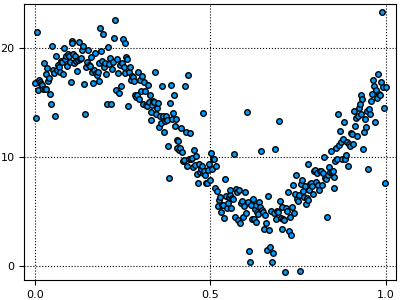

In [18]:
srand(0)
m = 365
t = linspace(0, 1, m)

phi1(t) = sin.(2pi*t)
phi2(t) = cos.(2pi*t)
phi3(t) = 1


b = 6*phi1(t) + 4*phi2(t) + 12*phi3(t) + randn(m)*1.1 +
    [rand() < 0.2 ? randn() * 3.5 : 0.0 for i = 1:m]

scatter(t, b, leg=false)

Seu objetivo é estimar a temperatura em um dia no futuro. Olhando para o gráfico, aparentemente a temperatura segue um modelo do tipo
$$
T(t) = \alpha + \beta \sin(2\pi t) + \gamma \cos(2\pi t).
$$
Note que o intervalo foi normalizado para $t \in [0,1]$.

Se $T_i$ é o valor medido no instante $t_i = \dfrac{i-1}{364}$, então definimos o erro como
$$ E(\alpha,\beta,\gamma) =
    \frac{1}{2}\sum_{i=1}^m [T(t_i) - T_i]^2. $$

Novamente, para minimizar esse erro, calcularemos as derivadas parciais e igualaremos a zero.
Note que apesar de $T$ ser uma função não linear em $t$, ela é linear em $\alpha$, $\beta$ e $\gamma$.

\begin{align}
\partial_{\alpha} E(\alpha,\beta,\gamma)
& = \sum_{i = 1}^m [T(t_i) - T_i] = 0 \\
\partial_{\beta} E(\alpha,\beta,\gamma)
& = \sum_{i = 1}^m [T(t_i) - T_i] \sin(2\pi t_i) = 0 \\
\partial_{\gamma} E(\alpha,\beta,\gamma)
& = \sum_{i = 1}^m[T(t_i) - T_i] \cos(2\pi t_i) = 0.
\end{align}

\begin{align}
\alpha \bigg(\sum_{i=1}^m 1\bigg) +
\beta  \bigg(\sum_{i=1}^m \sin(2\pi t_i)\bigg) +
\gamma \bigg(\sum_{i=1}^m \cos(2\pi t_i)\bigg)
& = \sum_{i=1}^m T_i \\
\alpha \bigg(\sum_{i=1}^m \sin(2\pi t_i)\bigg) +
\beta  \bigg(\sum_{i=1}^m \sin^2(2\pi t_i)\bigg) +
\gamma \bigg(\sum_{i=1}^m \sin(2\pi t_i)\cos(2\pi t_i)\bigg)
& = \sum_{i=1}^m T_i \sin(2\pi t_i) \\
\alpha \bigg(\sum_{i=1}^m \cos(2\pi t_i)\bigg) +
\beta  \bigg(\sum_{i=1}^m \sin(2\pi t_i)\cos(2\pi t_i)\bigg) +
\gamma \bigg(\sum_{i=1}^m \cos^2(2\pi t_i)\bigg)
& = \sum_{i=1}^m T_i \cos(2\pi t_i).
\end{align}

Note que podemos facilitar a maneira de escrever esse sistema definindo os seguintes vetores
$$
v^{(1)} = \left(\begin{array}{c}
1 \\
1 \\
\vdots \\
1
\end{array}\right),
\quad
v^{(2)} = \left(\begin{array}{c}
\sin(2\pi t_1) \\
\sin(2\pi t_2) \\
\vdots \\
\sin(2\pi t_{365})
\end{array}\right),
\quad
v^{(3)} = \left(\begin{array}{c}
\cos(2\pi t_1) \\
\cos(2\pi t_2) \\
\vdots \\
\cos(2\pi t_{365})
\end{array}\right),
\quad
b = \left(\begin{array}{c}
T_1 \\
T_2 \\
\vdots \\
T_{365}
\end{array}\right).
$$

Daí, a matriz do sistema é
$$\left[\begin{array}{ccc}
\left\langle v^{(1)}, v^{(1)} \right\rangle &
\left\langle v^{(1)}, v^{(2)} \right\rangle &
\left\langle v^{(1)}, v^{(3)} \right\rangle \\
\left\langle v^{(2)}, v^{(1)} \right\rangle &
\left\langle v^{(2)}, v^{(2)} \right\rangle &
\left\langle v^{(2)}, v^{(3)} \right\rangle \\
\left\langle v^{(3)}, v^{(1)} \right\rangle &
\left\langle v^{(3)}, v^{(2)} \right\rangle &
\left\langle v^{(3)}, v^{(3)} \right\rangle
\end{array}\right],$$
e o vetor do lado direito é
$$\left[\begin{array}{c}
\left\langle v^{(1)}, b \right\rangle \\
\left\langle v^{(2)}, b \right\rangle \\
\left\langle v^{(3)}, b \right\rangle
\end{array}\right].$$

In [19]:
m = 365
t = linspace(0, 1, m)
v1 = ones(m)
v2 = sin.(2π * t)
v3 = cos.(2π * t)
M = [dot(v1, v1) dot(v1, v2) dot(v1, v3);
     dot(v2, v1) dot(v2, v2) dot(v2, v3);
     dot(v3, v1) dot(v3, v2) dot(v3, v3)] 
c = [dot(v1, b); dot(v2, b); dot(v3, b)]

3-element Array{Float64,1}:
 4386.82 
 1076.73 
  735.532

In [20]:
α, β, γ = M\c

3-element Array{Float64,1}:
 12.0079 
  5.91609
  3.95368


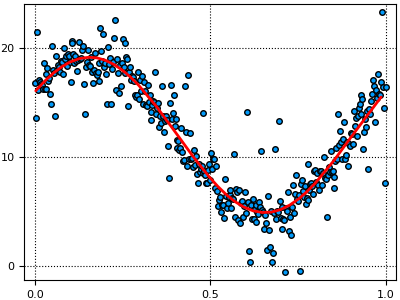

In [21]:
scatter(t, b, leg=false)
plot!(t->α + β*sin(2π*t) + γ*cos(2π*t), 0, 1, c=:red, lw=2)

Vimos como adaptar um conjunto de dados por alguns modelos específicos.
De uma maneira geral, podemos considerar um modelo da forma
$$ f(x) = \alpha_1 \phi_1(x) + \dots + \alpha_n \phi_n(x), $$
e fazer o mesmo procedimento.

Esse problema com esse modelo é dito **quadrados mínimos lineares discretos.**

Para encontrar os parâmetros $\alpha$ fazemos o mesmo procedimento anterior:
$$ \min E(\alpha) = \frac{1}{2} \sum_{i=1}^m [y_i - f(x_i)]^2
= \frac{1}{2} \sum_{i=1}^m \bigg[y_i - \sum_{j=1}^n \alpha_j\phi_j(x_i)\bigg]^2. $$

Derivando em cada $\alpha_k$ nos dá um sistema $M\alpha = c$, onde
$$ M_{kj} = \sum_{i=1}^m \phi_k(x_i)\phi_j(x_i) \qquad \mbox{e}
\qquad c_j = \sum_{i=1}^m \phi_j(x_i) y_i. $$

Dados a função $\phi_j$ e os pontos $x_i$, podemos definir um vetor $\overline{\phi}_j = (\phi_j(x_1), \dots, \phi_j(x_m))^T$, isto é, o vetor obtido aplicando $\phi_j$ em cada elemento $x_i$.
Com essa definição, podemos escrever
$$ M_{k,j} = \langle\overline{\phi}_k,\overline{\phi}_j\rangle \qquad \mbox{e} \qquad
c_j = \langle\overline{\phi}_j, y\rangle. $$

O sistema $M\alpha = c$ é chamado de **sistema normal**.

A medida de qualidade para cada dado individual é dada pelo **resíduo**:
$$ r = \left[\begin{array}{c}
y_1 - f(x_1) \\
y_2 - f(x_2) \\
\vdots \\
y_m - f(x_m)
\end{array}\right] $$

O erro pode ser escrito como $E(\alpha) = \frac{1}{2}\Vert r\Vert^2$.

In [22]:
function quadmin(x, y, F::Array{Function})
    # Implemente
end

quadmin (generic function with 1 method)

In [23]:
F = [x->1, x->sin(2π*x), x->cos(2π*x)]
# Mesmos t e b do exemplo anterior
α = quadmin(t, b, F)
scatter(t, b, leg=false)
plot!(t->α[1]*F[1](t) + α[2]*F[2](t) + α[3]*F[3](t), 0, 1, c=:red, lw=2)

LoadError: [91mMethodError: no method matching getindex(::Void, ::Int64)[39m

In [24]:
# Podemos escrever essa combinação de uma maneira resumida
f(t) = sum(α[i] * F[i](t) for i = 1:3)

f (generic function with 1 method)

In [25]:
scatter(t, b, leg=false)
plot!(f, 0, 1, c=:red, lw=2)

LoadError: [91mMethodError: no method matching getindex(::Void, ::Int64)[39m

## Forma matricial

Com os vetores $\overline{\phi}_1, \dots, \overline{\phi}$, podemos montar a matriz
$$ A = [\overline{\phi}_1 \cdots \overline{\phi}_n]. $$
Com essa matriz, podemos ver que $ A^TA = M$ e que $A^Ty = c$.
Ou seja, o sistema que queremos resolver é, na verdade
$$ A^TA\alpha = A^Tb, $$
ou seja, $A^T(A\alpha - b) = 0$.

Isso quer dizer que o sistema normal tem alguma relação com o sistema sobre-determinado $A\alpha = b$.
De fato, se pensarmos novamente no problema de minimizar aquela $E(\alpha)$, cada termo dentro do somatório é
uma linha de $A\alpha - b$.
Em outras palavras,
$$ E(\alpha) = \frac{1}{2}\sum_{i=1}^m (b - A\alpha)_i^2
= \frac{1}{2}\Vert A\alpha - b\Vert^2. $$

De fato, se calculamos $\nabla E(\alpha) = 0$, obtemos as equações normais.
Isso generaliza o problema de quadrados mínimos.
Esse problema aparece com frequência em outros contextos, e é bastante importante sabermos resolvê-lo eficientemente. Infelizmente, nesta disciplina, não teremos tempo de aprender como fazer isso de maneira eficiente.

Note ainda que o resíduo é $r = b - Ax$.

# Quadrados Mínimos Não-Lineares

Até agora supomos que o conjunto de dados $(x_i,y_i), i=1,\dots,m$
pode ser representado por uma função
$$f(x) = \alpha_1\phi_1(x) + \dots + \alpha_n\phi_n(x),$$
onde $\alpha$ são as incógnitas que buscamos.

No entanto, isso nem sempre é possível. Muitas vezes não temos uma forma para $f$, sabemos
apenas que depende de $\alpha$.

Um exemplo importante é o da lei de resfriamento. Se um objeto é deixado num ambiente com temperatura $T_a$, ocorrendo apenas troca de temperatura com o ambiente, o objeto pode ter sua temperatura modelada por
$$ T(t) = T_a + \alpha_1 e^{\alpha_2 t}, $$
onde sabemos que $\alpha_2 < 0$ pois $T(t) \rightarrow T_a$ quando $t \to \infty$.


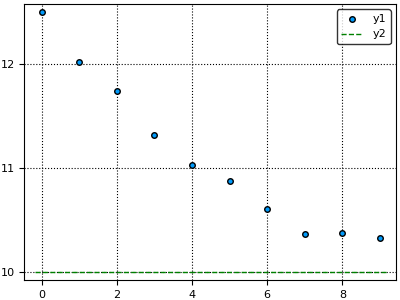

In [26]:
# Exemplo
Ta = 10
T = [12.5; 12.0175; 11.7431; 11.3182; 11.0262; 10.8738; 10.6046; 10.3639; 10.3717; 10.3292]
t = [0.0; 1.0; 2.0; 3.0; 4.0; 5.0; 6.0; 7.0; 8.0; 9.0]
scatter(t, T)
plot!(t->Ta, c=:green, l=:dash)

De uma maneira geral, podemos considerar um modelo $\Phi(\alpha,x) = \alpha_1 \phi_1(x) + \dots + \alpha_n \phi_n(x)$ e considerar a minimização de
$$E(\alpha) = \sum_{i=1}^m [y_i - \Phi(\alpha,x_i)]^2.$$
No entanto, esse problema é bem mais complicado que o que vimos aqui.

Felizmente, alguns casos podem ser **linearizados**.

## Quadrados Mínimos Não-Lineares Linearizável

Note o seguinte gráfico.


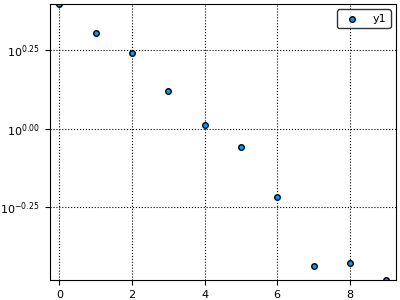

In [27]:

Ta = 10
T = [12.5; 12.0175; 11.7431; 11.3182; 11.0262; 10.8738; 10.6046; 10.3639; 10.3717; 10.3292]
t = [0.0; 1.0; 2.0; 3.0; 4.0; 5.0; 6.0; 7.0; 8.0; 9.0]
scatter(t, T - Ta, yaxis=:log)

Ou seja, embora os dados $(t_i,T_i)$ não possam ser aproximados por uma reta, os dados $(t_i,\ln (T_i - T_a))$ podem.


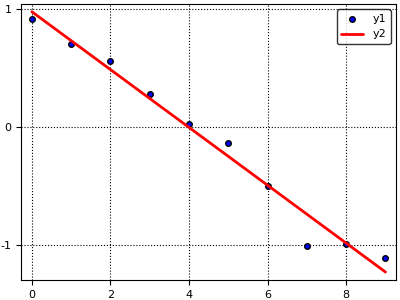

In [28]:
A = [ones(10) t]
α = (A'*A)\(A'*log.(T - Ta))
scatter(t, log.(T - Ta), c=:blue)
plot!(t, α[1] + α[2] * t, c=:red, lw=2)

Desse modo, estamos aproximando $\ln(T_i - T_a) \approx \alpha_1 + \alpha_2 t_i$, de modo que
$$T(t) \approx T_a + e^{\alpha_1 + \alpha_2 t_i}  = T_a + \beta_1 e^{\alpha_2 t_i}, $$
onde $\beta_1 = e^{\alpha_1}$.

Mas se $\alpha_1 + \alpha_2 x_i \approx \log y_i$, então $y_i \approx e^{\alpha_1 + \alpha_2 x_i}$.


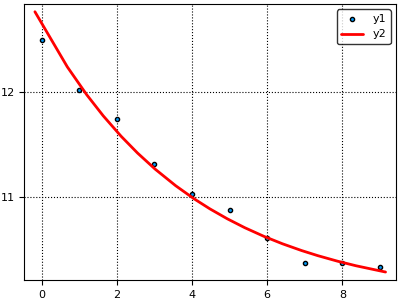

In [29]:
scatter(t, T, ms=3)
plot!(t->Ta + exp.(α[1] + α[2] * t), c=:red, lw=2)

De fato, esse modelo parece ajustar muito bem os dados.

Alguns dos modelos que podem ser linearizados estão abaixo:
$$ f(x) = \alpha_1e^{\alpha_2 x} $$
$$ f(x) = \frac{1}{\alpha_1 + \alpha_2 x} $$
$$ f(x) = \alpha_1 x^{\alpha_2} $$

Por exemplo, no primeiro caso $f(x) = \alpha_1e^{\alpha_x 2}$, se $y_i \approx f(x_i)$,
então $\ln y_i \approx \ln f(x_i)$.
Mas
$$ \ln f(x) = \ln \alpha_1 + \alpha_2 x. $$

Isso quer dizer que $g(x) = \beta_1 + \beta_2 x$ é um modelo linear para
$(x_i,\ln y_i), i=1,\dots,m$.
Podemos resolver o problema com o que já foi implementado, por exemplo, e
depois obter $\alpha_1 = e^{\beta_1}$ e $\alpha_2 = \beta_2$.

No caso $f(x) = \alpha_1x^{\alpha_2}$, a transformação também é $\ln f(x)$, obtendo
$$ \ln f(x) = \ln \alpha_1 + \alpha_2\ln x, $$
e aí $g(x) = \beta_1 + \beta_2\ln x$ é um modelo para $(x_i,\ln y_i)$, ou
$h(x) = \beta_1 + \beta_2x$ é um modelo polinomial para $(\ln x_i,\ln y_i)$.

No caso $f(x) = \dfrac{1}{\alpha_1 + \alpha_2 x}$, a transformação é $\dfrac{1}{f(x)}$.

A pergunta nesses casos é, tendo os dados, como saber qual a linearização?
Nesses casos, uma alternativa é tentar os gráficos das modificações.
Além disso, algumas coisas proíbem alguns modelos. Em particular, se $x$ é negativo, então $\log(x)$ é proibido. Se $y$ é negativo, então $\log(y)$ é negativo.

In [30]:
# Dados anteriores, do tipo αeᵝˣ
scatter(x, log.(y), ms=3)

LoadError: DomainError:
log will only return a complex result if called with a complex argument. Try log(complex(x)).


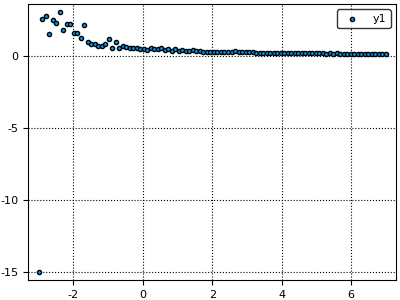

In [31]:
scatter(x, 1./y, ms=3) # Ruim


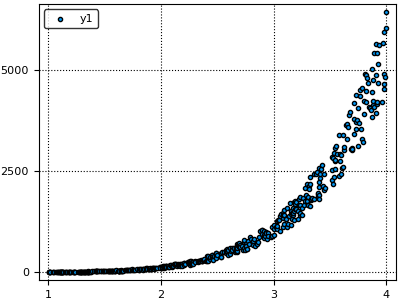

In [32]:
x = sort(rand(500)*3 + 1)
y = 2.1*x.^(5.5) .* (1 + rand(500)*0.5)
scatter(x, y, ms=3)


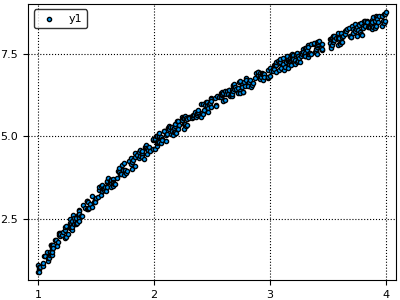

In [33]:
scatter(x, log.(y), ms=3)


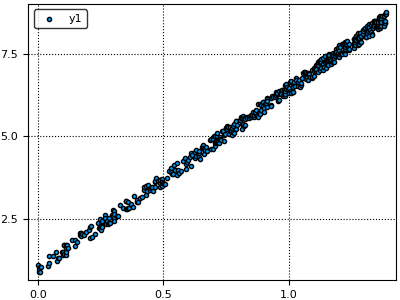

In [34]:
scatter(log.(x), log.(y), ms=3)


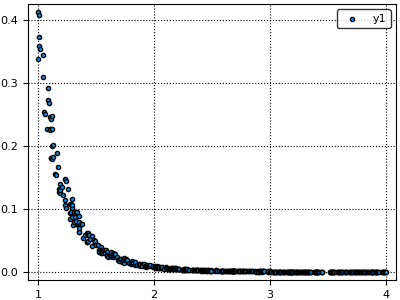

In [35]:
scatter(x, 1./y, ms=3)


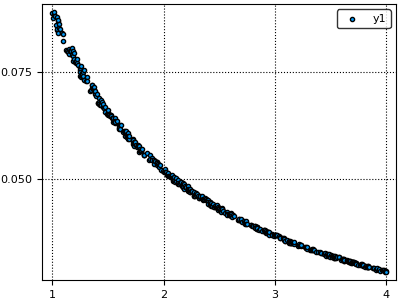

In [36]:
x = sort(rand(500)*3 + 1)
y = 1./(3 + 8*x + rand(500)*0.5)
scatter(x, y, ms=3)


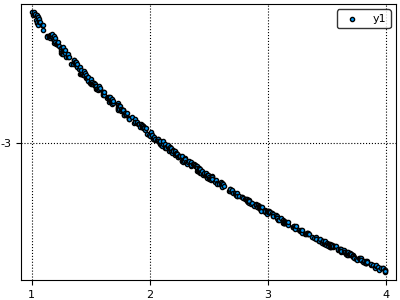

In [37]:
scatter(x, log.(y), ms=3)


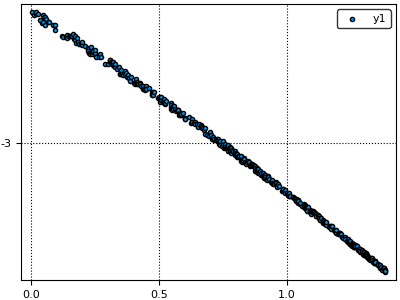

In [38]:
scatter(log.(x), log.(y), ms=3)


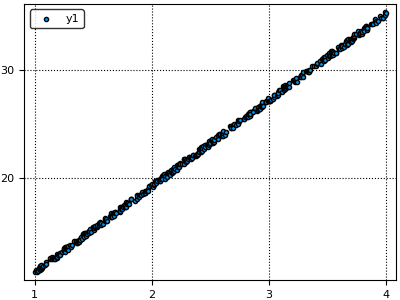

In [39]:
scatter(x, 1./y, ms=3)


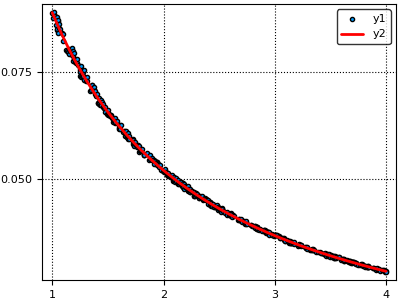

In [40]:
A = [ones(500) x]
α = (A'*A)\(A'*(1./y))

scatter(x, y, ms=3)
plot!(x, 1./(α[1] + α[2]*x), c=:red, lw=2)

## Álgebra linear do problema de quadrados mínimos

Como vimos, estamos minimizando $\Vert Ax -b \Vert$. Isso pode ser visto como $\min \Vert y -x\Vert$ para $y \in Im(A)$. Ou seja, estamos calculando a projeção de $b$ na imagem de $A$.

Se $b = y + z$, com $y \in Im(A)$, então $z \perp Im(A)$. Mas, $Im(A)^{\perp} = Nu(A^T)$, de modo que $z \in Nu(A^T)$. Em outras palavras, $A^Tz = 0$. Como $y \in Im(A)$, então existe $u$ tal que $y = Au$. Daí, temos
$b = Au + z$ com $A^Tz = 0$.
Sendo assim,
$$\Vert Ax - b\Vert^2
= \Vert Ax - Au - z\Vert^2
= \Vert A(x - u) - z\Vert^2
= \Vert A(x - u)\Vert^2 + \Vert z\Vert^2,
$$
onde a última igualdade segue de ortogonalidade.
Portanto, a escolha que minimiza $\Vert Ax - b\Vert$, é $x = u$, já que $\Vert z\Vert$ não pode ser modificado pela escolha de $x$. Nisso, temos
$$r = b - Ax = Au + z - Au = z,$$
isto é, $r$ é a projeção ortogonal de $b$ no núcleo de $A^T$.

Note que, apesar de intepretação da projeção ortogonal, a solução $x$ é o coeficiente dos vetores que gera a projeção.

## Exercícios

- Faça os exercícios do capítulo 6 do livro Cálculo Numérico de Ruggiero e Lopes.

- Mostre que a matriz $A^TA$ tem inversa se as colunas de $A$ forem linearmente independentes. Dica: Mostre que $\mathcal{N}(A) = \mathcal{N}(A^TA)$.

- Modele os dados abaixo,
   - Utilizando o modelo $\varphi(x) = \alpha_1 + \alpha_2 \sin(2\pi t) + \alpha_3 \cos(2\pi t)$;
   - Utilizando o modelo $\varphi(x) = \alpha_1 + \alpha_2 \sin(2\pi t) + \alpha_3 \cos(2\pi t) + \alpha_4 \sin(4\pi t) + \alpha_5 \cos(4\pi t)$;
   - Compare os dois ajustes.
   
| $x$ | 0.000 | 0.125 | 0.250 |  0.375 |  0.500 | 0.625 | 0.750 | 0.875 | 1.000 |
|-|
| $y$ | 7.500 | 6.200 | 2.700 | -0.800 | -0.500 | 1.600 | 4.100 | 6.500 | 7.200 |

- [Nesta página](https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Tabela_clim%C3%A1tica_de_Curitiba) encontram-se as temperaturas médias de Curitiba de vários anos. Ajuste esses dados.

- O problema de quadrados mínimos $\min \frac{1}{2}\Vert Ax - b\Vert^2$ pode ser visualizado como a projeção ortogonal de $b$ na imagem de $A$.
  - O que acontece se $b$ está na imagem de $A$?
  - O que acontece se $b$ é ortogonal à imagem de $A$?
  - Qual seria o problema de quadrados mínimos para se encontrar a projeção ortogonal de $b$ na imagem de $A^T$?
  - Como $Im(A)$ é um subespaço, podemos escrever $b$ como a soma de um elemento de $Im(A)$ e um elemento ortogonal à $Im(A)$. Mostre quem é a solução e o resíduo do problema de quadrados mínimos em função dessa separação d

- Usando quadrados mínimos, encontre a projeção ortogonal de um vetor $v$ sobre outro vetor $w$.
- O que acontece se a matriz $A$ tiver colunas ortogonais?
- O que acontece se a matriz $A$ não tiver colunas linearmente independentes?